In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

import cv2
import random as rn
from random import shuffle
import keras
from keras.layers import Flatten,Dense, Activation ,Dropout
from keras.models import Sequential
from keras.utils import to_categorical,normalize
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from sklearn.model_selection import train_test_split
from keras.optimizers import SGD,Adam


In [2]:
print(tf.__version__)
print(keras.__version__)

2.2.0
2.1.5


In [14]:
lookup={}
reverse_lookup={}
count=0
for i in os.listdir('gest output'):
    lookup[i]=count
    reverse_lookup[count]=i
    count+=1

print(lookup)
print(reverse_lookup)

{'fist': 0, 'l': 1, 'palm': 2, 'peace': 3}
{0: 'fist', 1: 'l', 2: 'palm', 3: 'peace'}


In [15]:
counts=[]
for i in os.listdir('gest output'):
    count=0
    for j in os.listdir('gest output/'+i):
        count+=1
    counts.append(count)

dct=dict(zip(lookup.keys(),counts))
print(dct)

{'fist': 2328, 'l': 2295, 'palm': 2232, 'peace': 2402}


In [16]:
x_data=[]
y_data=[]
datacount=0
for i in os.listdir('gest output'):
    count=0
    for j in os.listdir('gest output/'+i):
        img=cv2.imread('gest output/'+i+'/'+j)
        img=cv2.resize(img,(150,150))
        gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        arr=np.array(gray_image)
        x_data.append(arr)
        count+=1
        y_data.append(lookup[i])
    datacount=datacount+count

In [17]:
y_data=np.array(y_data)
y_data.reshape(datacount,1)
x_data=np.array(x_data)
x_data.shape

(9257, 150, 150)

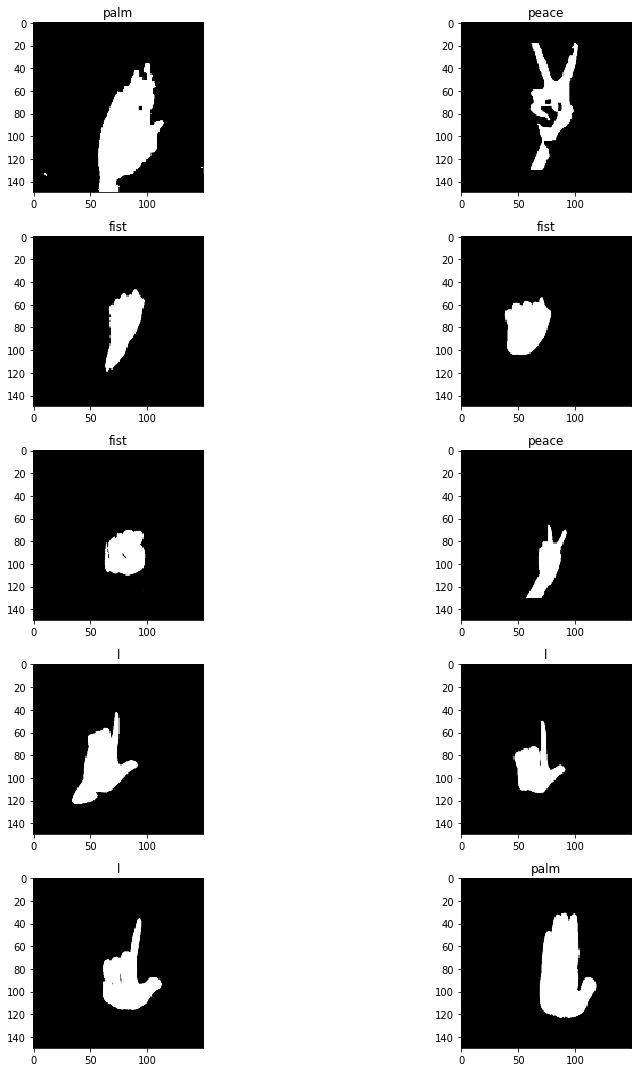

In [56]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(y_data))
        ax[i,j].imshow(x_data[l])
        ax[i,j].set_title(reverse_lookup[y_data[l]])
        
plt.tight_layout()

In [18]:
y_data=to_categorical(y_data)

In [19]:
x_data=x_data/255.0

In [20]:
x_data.shape

(9257, 150, 150)

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data)

In [22]:
x_train.shape

(6942, 150, 150)

In [23]:
x_test.shape

(2315, 150, 150)

In [24]:
y_test.shape

(2315, 4)

In [25]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(4, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train,y_train, epochs=10)

test_loss = model.evaluate(x_test,y_test)

Epoch 1/10
217/217 [==============================] - 5s 21ms/step - loss: 0.2450 - accuracy: 0.9262 0s - loss: 0.2590 - accu
Epoch 2/10
217/217 [==============================] - 4s 19ms/step - loss: 0.0205 - accuracy: 0.9960
Epoch 3/10
217/217 [==============================] - 4s 20ms/step - loss: 0.0060 - accuracy: 0.9999
Epoch 4/10
217/217 [==============================] - 4s 21ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 5/10
217/217 [==============================] - 4s 20ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 6/10
217/217 [==============================] - 5s 21ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 7/10
217/217 [==============================] - 5s 21ms/step - loss: 9.5087e-04 - accuracy: 1.0000
Epoch 8/10
217/217 [==============================] - 4s 21ms/step - loss: 6.5265e-04 - accuracy: 1.0000
Epoch 9/10
217/217 [==============================] - 4s 19ms/step - loss: 4.6864e-04 - accuracy: 1.0000
Epoch 10/10
73/73 [==============================] - 0

In [26]:
predictions=model.predict(x_test)

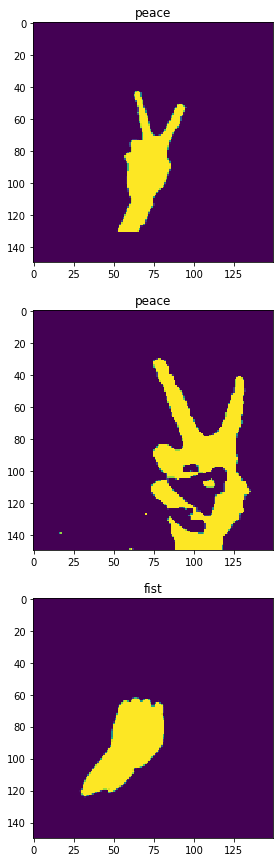

In [27]:
fig,ax=plt.subplots(3,1)
fig.set_size_inches(15,15)
val=0
for i in range(0,3):
    l=rn.randint(0,2000)
    ax[i].imshow(x_test[l])
    r=predictions[l].round()
    for j in range(0,len(r)):
        if r[j]==1:
            val=j
    ax[i].set_title(reverse_lookup[val])